<a href="https://colab.research.google.com/github/prajeshatm/hello/blob/main/HamoyeStageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('/content/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.shape

(61716, 5)

In [7]:
df1=df.drop(columns=['SysLoad', 'Tmax','GasPrice'])
df1.head()

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
df1[ 'FullDate' ]= pd.to_datetime(df1[ 'FullDate' ])
df1 = df1.rename(columns={"FullDate":"ds","ElecPrice" : "y" })
df1.head()

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030


In [9]:
df2=df1.iloc[:2757,:]
df3=df1.iloc[2758:,:]


In [10]:
model = Prophet()
model.fit(df2)
#future = model.make_future_dataframe(periods= 2 , freq= 'M' )
forecast = model.predict(df3)
forecast.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-24 22:00:00,13.710061,-114.464592,144.511480,13.710061,13.710061,-0.521137,-0.521137,-0.521137,-2.481163,-2.481163,-2.481163,1.960026,1.960026,1.960026,0.0,0.0,0.0,13.188924
1,2010-12-24 23:00:00,13.699505,-121.817018,140.566072,13.699505,13.699505,1.221229,1.221229,1.221229,-0.699176,-0.699176,-0.699176,1.920404,1.920404,1.920404,0.0,0.0,0.0,14.920734
2,2010-12-25 00:00:00,13.688949,-106.830494,136.757166,13.688949,13.688949,2.102380,2.102380,2.102380,0.310292,0.310292,0.310292,1.792088,1.792088,1.792088,0.0,0.0,0.0,15.791329
3,2010-12-25 01:00:00,13.678393,-113.500505,138.219160,13.678393,13.678393,0.001827,0.001827,0.001827,-1.572262,-1.572262,-1.572262,1.574089,1.574089,1.574089,0.0,0.0,0.0,13.680220
4,2010-12-25 02:00:00,13.667837,-123.647129,135.746513,13.667837,13.667837,-4.728313,-4.728313,-4.728313,-5.994929,-5.994929,-5.994929,1.266616,1.266616,1.266616,0.0,0.0,0.0,8.939524


In [11]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df[ 'ElecPrice' ])
print('ADF Statistic:', adf_result[ 0 ] )
print('p-value: ',adf_result[ 1 ] )
print('No. of lags used:', adf_result[ 2 ])
print('No. of observations used : ',adf_result[ 3 ])
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: nan
p-value:  nan
No. of lags used: 0
No. of observations used :  61715
Critical Values:
 1% : -3.4304559640608128 
 5% : -2.86158683413459 
 10% : -2.5667949282267792 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
df[ 'FullDate' ]= pd.to_datetime(df[ 'FullDate' ])
df = df.rename(columns={"FullDate":"ds","SysLoad":"add1","Tmax":"add2","GasPrice":"add3","ElecPrice" : "y" })
df.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [12]:
df4=df.iloc[:2757,:]
df5=df.iloc[2758:,:]

In [14]:
model = Prophet()
model.fit(df4)
#predict for the next 10 months
#future = model.make_future_dataframe(periods= 2 , freq= 'M' )
forecast = model.predict(df5)
forecast.head()


ValueError: ignored

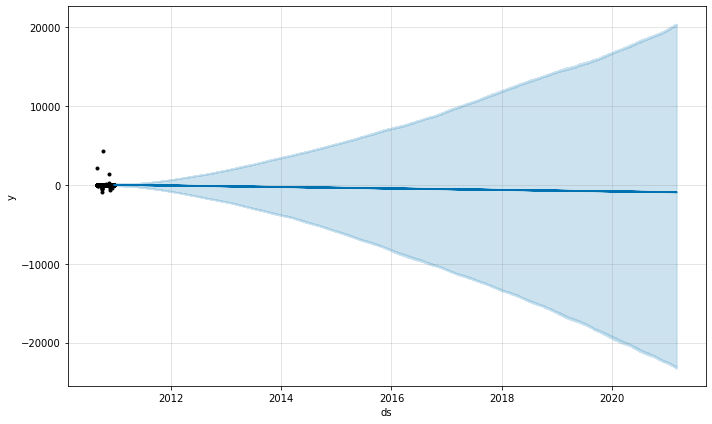

In [ ]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()